# Multi-class Classification and Neural Networks

In this part, we will implement one-vs-all logistic regression and neural networks to recognize hand-written digits.

# Multi-class Classification

In this part, we will extend the implementation of logistic regression and apply it to one-vs-all classification.

In [1]:
import numpy as np
import pandas as pd
import mat4py as mat
import matplotlib.pyplot as plt
from __future__ import division
from scipy.optimize import minimize

In [2]:
data1 = mat.loadmat("E:\\Machine Learning\\1\\ex3data1.mat")
data1 = pd.DataFrame(data1)
np.shape(data1)

(5000, 2)

In [3]:
data1.head()

,X,y
0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",[10]
1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",[10]
2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",[10]
3,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",[10]
4,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",[10]


In [4]:
Y_mat = np.transpose(np.mat(data1["y"]))
X_mat = np.transpose(np.mat(data1["X"]))

np.shape(Y_mat), np.shape(X_mat), np.shape(X_mat[0, 0]), type(X_mat[0, 0])

((5000, 1), (5000, 1), (400,), list)

There are 5000 training examples in the dataset, where each training example is a 20 pixel by 20 pixel image of the digit. Each pixel is represented by a floating point number indicating the grayscale intensity at that location. The 20 by 20 grid of pixel is "unrolled" into a 400-dimensional vector.

In [10]:
random_indices = np.random.permutation(np.shape(X_mat)[0])

X_mat_plot = X_mat[random_indices[0:100], 0]
Y_mat_plot = Y_mat[random_indices[0:100], 0]

In [23]:
rows = np.shape(X_mat_plot)[0]
cols = len(X_mat_plot[0, 0])

example_width = int(cols ** 0.5)
example_height = int(cols / example_width)

display_rows = int(np.floor(rows ** 0.5))
display_cols = int(np.ceil(rows / display_rows))

In [24]:
pad = 1

display_array = -np.ones((pad + display_rows * (example_height + pad), pad + display_cols * (example_width + pad)))

curr_ex = 0
for j in range(0, display_rows, 1):
    for i in range(0, display_cols, 1):
        max_val = max(map(abs, X_mat_plot[curr_ex, :][0, 0]))
        display_array[pad + j * (example_height + pad): pad + j * (example_height + pad) + example_height, \
            pad + i * (example_width + pad): pad + i * (example_width + pad) + example_width] = \
            np.reshape(X_mat_plot[curr_ex, :][0, 0], (example_height, example_width)) / max_val
        
        curr_ex = curr_ex + 1


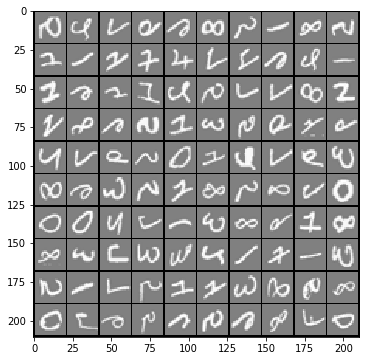

In [25]:
plt.figure(num = 1, figsize = (6, 6))

plt.imshow(display_array, cmap = "gray")

Vectorizing Logistic Regression

We will be using multiple one-vs-all logistic regression models to build a multi-class classifier. Since there are 10 classes, we will need to train 10 separate logistic regression classifiers.

In [60]:
theta_array = np.zeros(len(X_mat[0, 0]) + 1)

def costGradientFunc(theta_array):
    theta_mat = np.transpose(np.mat(theta_array))
    m = len(X_mat)
    J_theta_row = 0
    G_theta = np.zeros(np.shape(theta_mat)[0])
    
    for i in range(0, m, 1):
        X_mat_row = np.mat((np.hstack((1, X_mat[i, 0]))))
        Y_mat_row = (np.mat(Y_mat[i, 0]))[0, 0]
        Y_predict_row = (1 / (1 + np.exp(-X_mat_row * theta_mat)))[0, 0]
        J_theta_row = J_theta_row + (-Y_mat_row * np.log(Y_predict_row) - (1 - Y_mat_row) * np.log(1 - Y_predict_row))
        
        for j in range(0, len(G_theta), 1):
            G_theta[j] = G_theta[j] + (Y_predict_row - Y_mat_row) * X_mat_row[0, j]
        
    
    return J_theta_row / m, G_theta / m

In [61]:
costGradientFunc(theta_array)

(0.6931471805599917,
 array([-5.00000000e+00,  0.00000000e+00,  0.00000000e+00, -7.74530186e-08,
         3.19876600e-06,  1.89536237e-05, -7.06376094e-04, -8.97395355e-04,
        -3.72741263e-04, -1.10787541e-04, -1.37049401e-04, -4.11905416e-05,
         3.09307938e-05,  7.56273049e-05,  1.66101324e-04,  1.88959823e-04,
         1.11618541e-04,  3.44740605e-05,  2.31849497e-07, -3.65944989e-07,
         0.00000000e+00, -2.71480120e-07,  2.68348312e-06,  1.35802658e-06,
         5.10971729e-05,  9.29459372e-05, -1.13518367e-03, -4.04630781e-03,
        -5.65616107e-03, -4.38249876e-03, -1.22936584e-03,  1.06402725e-03,
         1.67724463e-03,  1.83122226e-03,  1.41359436e-03,  1.00669534e-03,
         6.22600175e-04,  2.88468971e-04,  1.69300222e-04,  4.53328568e-05,
         1.64277642e-05,  2.32894093e-06, -2.61429416e-05,  6.07579192e-05,
        -2.68789968e-04, -2.19152610e-03, -1.11673884e-02, -2.41869621e-02,
        -3.12963830e-02, -2.35164217e-02, -1.04915336e-02, -4.58342

Vectorizing regularized logistic regression

In [77]:
theta_array = np.zeros(len(X_mat[0, 0]) + 1)

def costGradientFunc(theta_array, lambda1):
    theta_mat = np.transpose(np.mat(theta_array))
    m = len(X_mat)
    J_theta_row = 0
    G_theta = np.zeros(np.shape(theta_mat)[0])
    
    for i in range(0, m, 1):
        X_mat_row = np.mat((np.hstack((1, X_mat[i, 0]))))
        Y_mat_row = (np.mat(Y_mat[i, 0]))[0, 0]
        Y_predict_row = (1 / (1 + np.exp(-X_mat_row * theta_mat)))[0, 0]
        J_theta_row = J_theta_row + (-Y_mat_row * np.log(Y_predict_row) - (1 - Y_mat_row) * np.log(1 - Y_predict_row))
        
        for j in range(0, len(G_theta), 1):
            G_theta[j] = G_theta[j] + (Y_predict_row - Y_mat_row) * X_mat_row[0, j]
            
    
    J_theta = J_theta_row / m + lambda1/(2*m) * (sum(theta_array ** 2) - theta_array[0] ** 2) 
    
    for j in range(1, len(G_theta), 1):
        G_theta[j] = G_theta[j] + lambda1/m * (theta_array[j])
        
    
    return J_theta

In [78]:
costGradientFunc(theta_array, 1)

0.6931471805599917

# Neural Networks

Logistic regression cannot form more complex hypotheses as it is only a linear classifier.

In this part, we will implement a neural network to recognize handwritten digits. The neural network will be able to represent complex models that form non-linear hypotheses.

In [79]:
data2 = mat.loadmat("E:\\Machine Learning\\1\\ex3weights.mat")

theta1_nn_matrix = np.mat(data2["Theta1"])
theta2_nn_matrix = np.mat(data2["Theta2"])

np.shape(theta1_nn_matrix), np.shape(theta2_nn_matrix)

((25, 401), (10, 26))

Feedforward Propagation and Prediction

In [80]:
data1 = mat.loadmat("E:\\Machine Learning\\1\\ex3data1.mat")

In [81]:
one = np.transpose(np.mat(np.ones(len(data1["X"]))))

Y_nn_matrix = np.mat(data1["y"])
X_nn_matrix = np.hstack((one, np.mat(data1["X"])))


np.shape(Y_nn_matrix), np.shape(X_nn_matrix)

((5000, 1), (5000, 401))

In [82]:
def predict(theta1, theta2):
    m = np.shape(X_nn_matrix)[0]
    num_labels = np.shape(theta2)[0]
    
    p = np.zeros(m)
    
    H_x_layer2 = 1 / (1 + np.exp(-X_nn_matrix * np.transpose(theta1)))
    
    one = np.transpose(np.mat(np.ones(m)))
    input_layer2 = np.hstack((one, H_x_layer2))
    
    H_x_layer3 = 1 / (1 + np.exp(-input_layer2 * np.transpose(theta2)))
    
    
    for i in range(0, m, 1):
        list1 = []
        
        for j in range(0, num_labels, 1):
            list1.append(H_x_layer3[i, j])
    
        p[i] = int(list1.index(max(list1)) + 1)
        
    
    return p

In [83]:
pd.Series(predict(theta1_nn_matrix, theta2_nn_matrix)).value_counts()

1.0     507
5.0     506
10.0    505
6.0     504
8.0     502
4.0     499
7.0     496
9.0     496
2.0     494
3.0     491
dtype: int64